### Описание задачи

Многомерное (n-мерное) нормальное распределение - это вероятностное распределение с плонтностью:

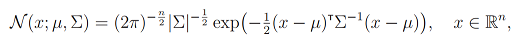

μ - n-мерный вектор, являющийся математическим ожиданием или центром распределения.

Σ - матрица nₓn, называемая ковариационной, описывающая попарные ковариации элементов. Ограничения для Σ: невырожденность и положительно-определенность.  Обычно Σ считают симметричной.

Особые случаи для нормального расспределения - наличие нулей на главной диагонали, что понижает размерность распределения.

### Код программы

Для ускорения рассчетов некоторые множители рассчитываются заранее. Также в классе предусмотренна "векторизация" нормального распределения, что позволяет строить графики на его основе.

In [ ]:
import numpy as np


class NDimensionalNormalDistribution:
    cov_matrix: np.matrix
    n: int
    center: np.array

    inverse_cov_matrix: np.matrix
    det_cov_matrix: float
    multiply_coefficient: float

    grid: list

    def __init__(self, cov_matrix, center, distance_from_center=5, step=0.5, make_grid=True):
        if type(center) is not np.ndarray:
            self.n = 1
            self.cov_matrix = np.matrix(cov_matrix)
            self.center = np.array(center)
            if make_grid:
                cords = []
                a = self.center - distance_from_center
                b = self.center + distance_from_center
                cords.append(slice(a, b, step))
                self.grid = np.mgrid[tuple(cords)]
        else:
            self.cov_matrix = cov_matrix
            self.n = center.shape[0]
            self.center = center

            if make_grid:
                cords = []
                for cord in self.center:
                    a = cord - distance_from_center
                    b = cord + distance_from_center
                    cords.append(slice(a, b, step))
                self.grid = np.mgrid[tuple(cords)]

        self.inverse_cov_matrix = np.linalg.inv(self.cov_matrix)
        self.det_cov_matrix = np.linalg.det(self.cov_matrix)
        self.multiply_coefficient = (2 * np.pi) ** (-self.n / 2) / np.sqrt(self.det_cov_matrix)

    def probability(self, *args):
        xc = np.matrix(- self.center + args).T
        exp_pow = -0.5 * np.asscalar(xc.T * self.inverse_cov_matrix * xc)
        return self.multiply_coefficient * np.exp(exp_pow)

    def vectorize_probability(self):
        vec_f = np.vectorize(self.probability)
        return vec_f(*self.grid)

### Результаты

#### Одномерный случай

Σ = 1 

μ = 0

График изображает плотность распределения.

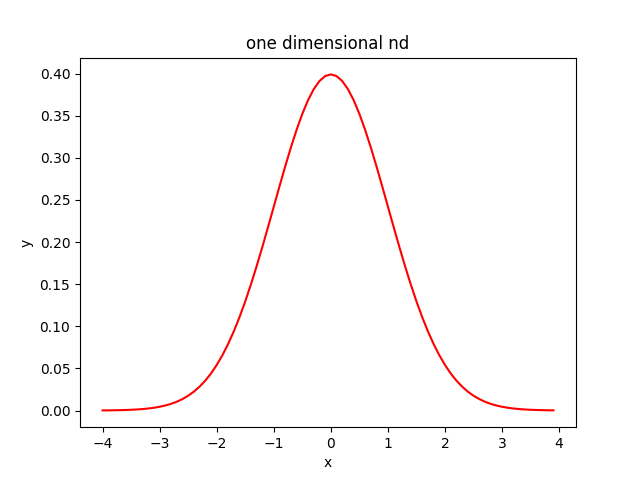

#### Двумерный случай

##### Окружность

Σ = $ \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}  $

μ = $ \begin{bmatrix}
0 \\
0 
\end{bmatrix}  $

Линии уровня:

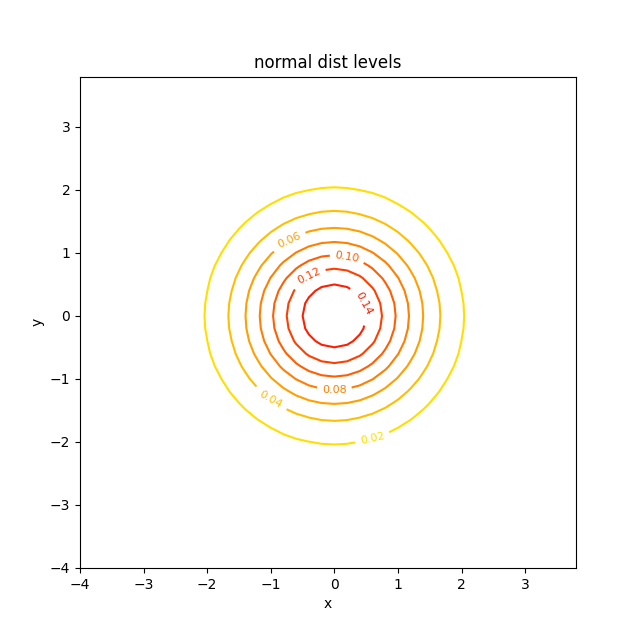

Трехмерный график:

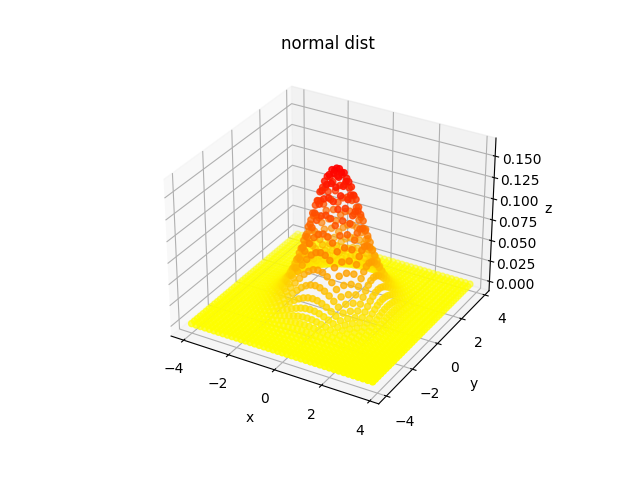

##### Эллипс - оси ортогональны координатным

Σ = $ \begin{bmatrix}
1 & 0 \\
0 & 3
\end{bmatrix}  $

μ = $ \begin{bmatrix}
0 \\
0 
\end{bmatrix}  $

Линии уровня:

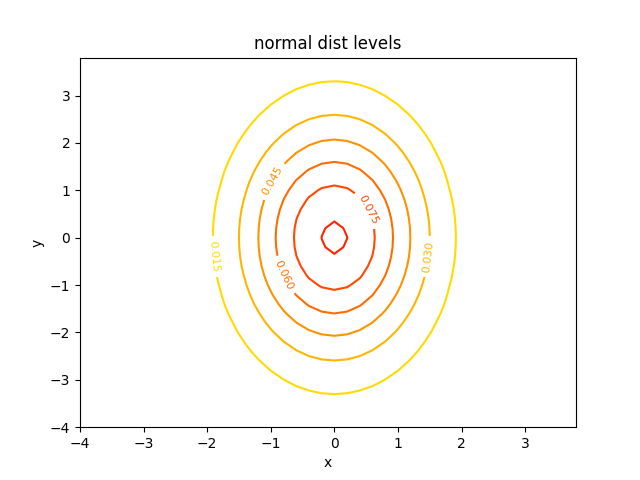

Трехмерный график:

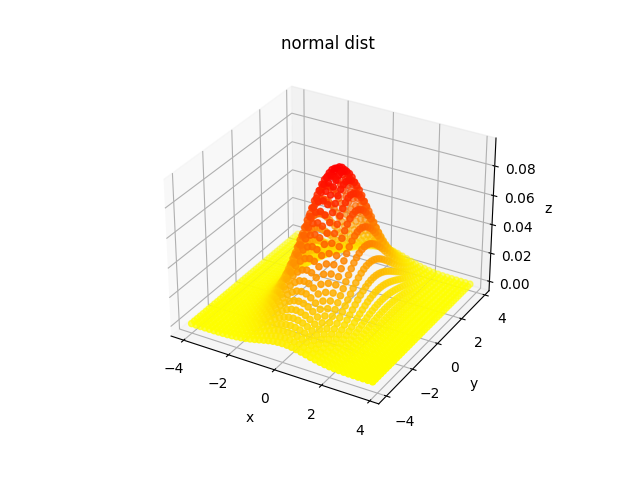

##### Эллипс - оси ортогональны собственным векторам ковариационной матрицы

Σ = $ \begin{bmatrix}
2 & 1 \\
1 & 3
\end{bmatrix}  $

μ = $ \begin{bmatrix}
0 \\
0 
\end{bmatrix}  $

Линии уровня:

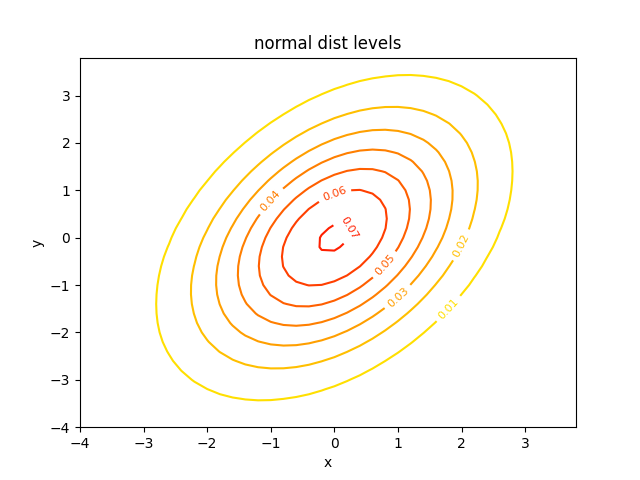

Трехмерный график:

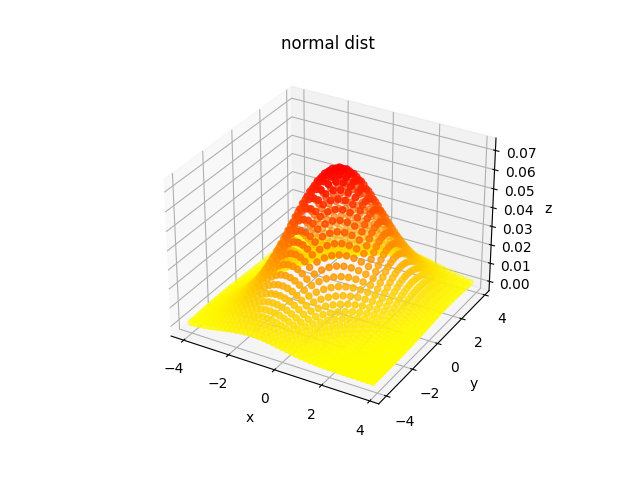

#### Трехмерный случай

Σ = $ \begin{bmatrix}
3 & 2 & 1 \\
2 & 3 & 2 \\
1 & 2 & 5 
\end{bmatrix}  $

μ = $ \begin{bmatrix}
0 \\
0 \\
0 
\end{bmatrix}  $

График отображает линии уровня плотности, они представляют из себя эллипсоиды:

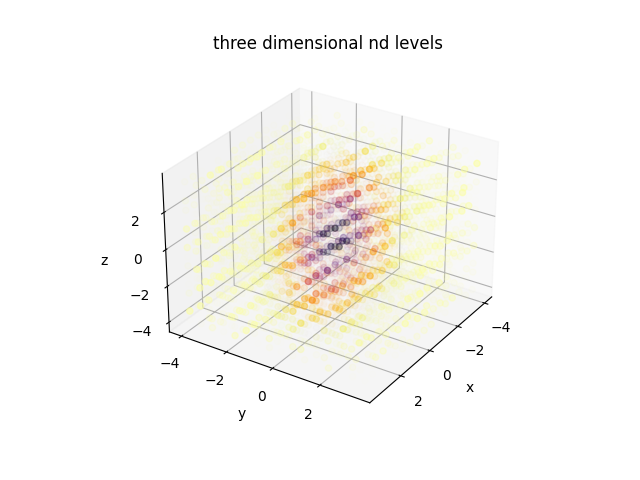

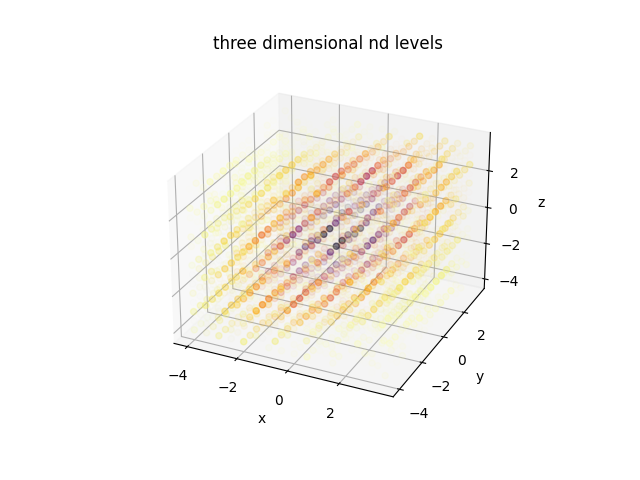

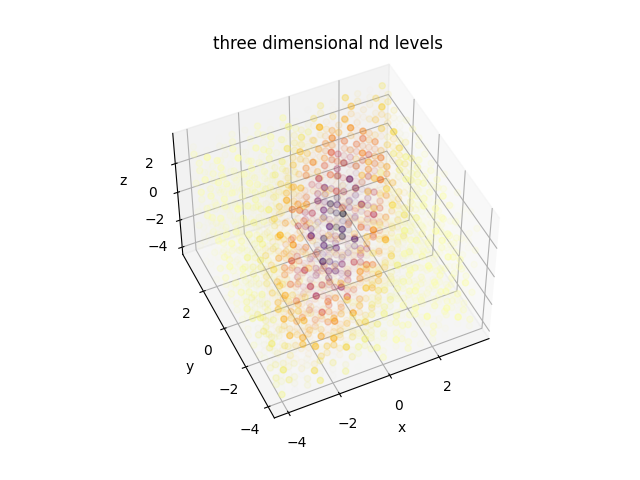

#### Особые случаи:

Рассмотрим особые случаи для двумерной плотности, при чем среднее на "особенность случая не влияет".

1. Вырожденный случай по y:

Σ = $ \begin{bmatrix}
0 & -1 \\
1 & 2 
\end{bmatrix}  $

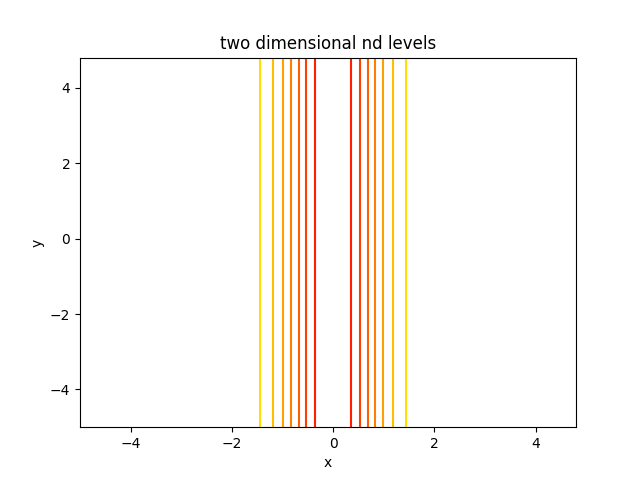

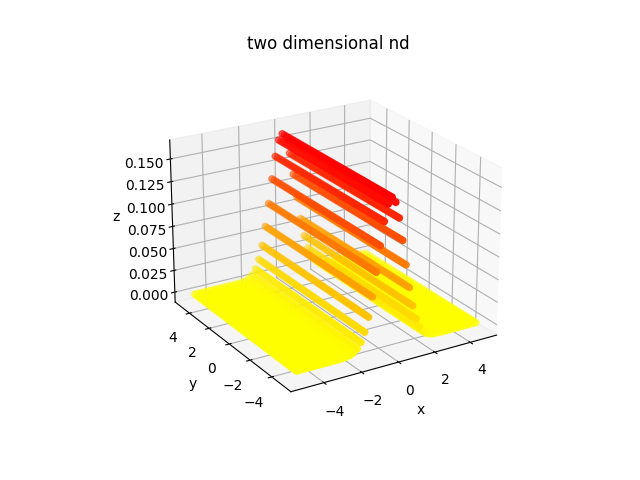

2. Вырожденный случай по x:

Σ = $ \begin{bmatrix}
2 & -1 \\
1 & 0 
\end{bmatrix}  $

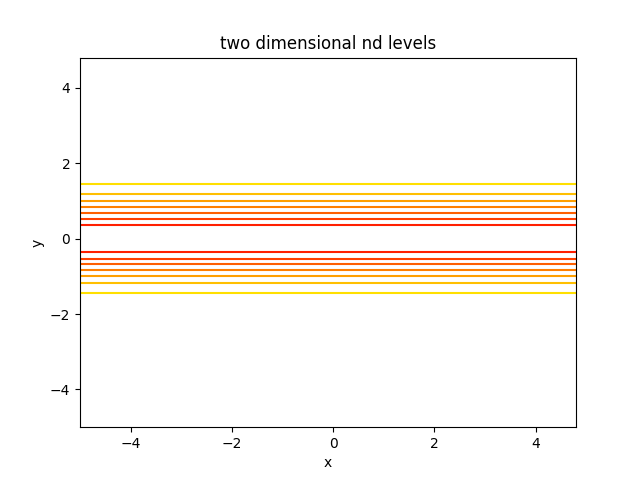

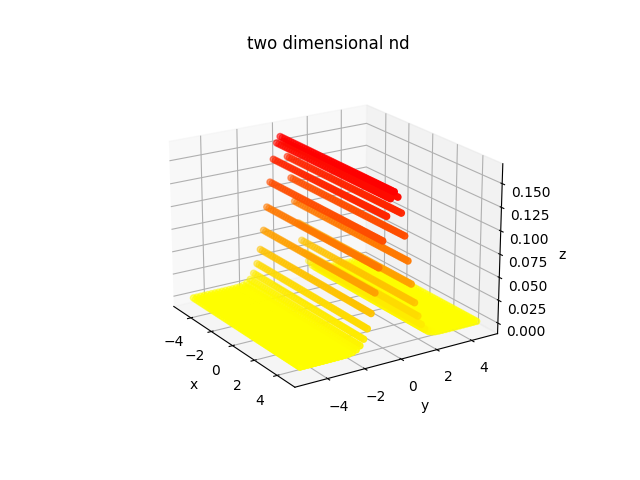

Таким образом, ковариационная матрица неотрицательно определена, невырожденна, однако не симметрична и на главной диагонали есть 0. Особый случай заключается в том, что теряется целая размерность плотности распределения.  